In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
!wget -O casestudy1.csv 'https://drive.google.com/file/d/1s09l3nnhC0Ruy6T0Y6w04xFZ7YwwszUS/view?usp=sharing'

--2022-04-10 18:20:57--  https://drive.google.com/file/d/1s09l3nnhC0Ruy6T0Y6w04xFZ7YwwszUS/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.20.102, 74.125.20.138, 74.125.20.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘casestudy1.csv’

casestudy1.csv          [ <=>                ]  64.66K  --.-KB/s    in 0.03s   

2022-04-10 18:20:57 (2.11 MB/s) - ‘casestudy1.csv’ saved [66208]



In [27]:
df = pd.read_csv('casestudy.csv')

In [28]:
df.head()


,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
le = LabelEncoder()
df['customer_email'] = le.fit_transform(df['customer_email'])

In [26]:
df.head()

,customer_email,net_revenue,year
0,105114,249.92,2015
1,351950,87.61,2015
2,518676,168.38,2015
3,54869,62.40,2015
4,397079,43.08,2015


In [24]:
df.customer_email.value_counts()

554360    3
376526    3
585941    3
448888    3
423779    3
         ..
78931     1
303881    1
456855    1
147839    1
5255      1
Name: customer_email, Length: 604618, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_email  685927 non-null  int64  
 1   net_revenue     685927 non-null  float64
 2   year            685927 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 15.7 MB


In [9]:
df.describe()

,customer_email,net_revenue,year
count,685927.000000,685927.000000,685927.000000
mean,304536.549477,125.647755,2016.027252
std,174060.143800,71.854528,0.837203
min,0.000000,1.000000,2015.000000
25%,154618.500000,63.510000,2015.000000
50%,305464.000000,125.730000,2016.000000
75%,455089.500000,187.820000,2017.000000
max,604617.000000,250.000000,2017.000000


In [10]:
df15 = df[df.year == 2015]
df16 = df[df.year == 2016]
df17 = df[df.year == 2017]

In [11]:
total_revenue = df.groupby('year')['net_revenue'].sum()
print(total_revenue)
print('*'*80)
print('\n')

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64
********************************************************************************




In [12]:
new_cust16 = df16[~df16.customer_email.isin(df15.customer_email)]
new_cust17 = df17[~df17.customer_email.isin(df16.customer_email)]
print('New customer revenue for year 2016: ', round(new_cust16['net_revenue'].sum(),2))
print('New customer revenue for year 2017: ', round(new_cust17['net_revenue'].sum(),2))
print('*'*80)
print('\n')

New customer revenue for year 2016:  18245491.01
New customer revenue for year 2017:  28776235.04
********************************************************************************




In [13]:
exist_cust16 = df16[df16.customer_email.isin(df15.customer_email)]
exist_cust16prev = df15[df15.customer_email.isin(df16.customer_email)]
exist_cust17 = df17[df17.customer_email.isin(df16.customer_email)]
exist_cust17prev = df16[df16.customer_email.isin(df17.customer_email)]
print('Existing customer growth for year 15-16: ', round(exist_cust16['net_revenue'].sum()-exist_cust16prev['net_revenue'].sum(),2))
print('Existing customer growth for year 16-17: ', round(exist_cust17['net_revenue'].sum()-exist_cust17prev['net_revenue'].sum(),2))
print('*'*80)
print('\n')

Existing customer growth for year 15-16:  20335.46
Existing customer growth for year 16-17:  20611.34
********************************************************************************




In [14]:
attr_cust15 = df15[~df15.customer_email.isin(df16.customer_email)]
attr_cust16 = df16[~df16.customer_email.isin(df17.customer_email)]
print('Revenue lost in 2016 due to attrition from year 2015: ',round(attr_cust15['net_revenue'].sum(),2))
print('Revenue lost in 2017 due to attrition from year 2016: ',round(attr_cust16['net_revenue'].sum(),2))
print('*'*80)
print('\n')

Revenue lost in 2016 due to attrition from year 2015:  21571632.07
Revenue lost in 2017 due to attrition from year 2016:  23110294.94
********************************************************************************




In [15]:
print('Existing customer revenue Current Year for 2016: ', round(exist_cust16['net_revenue'].sum(),2))
print('Existing customer revenue Prior Year for 2016: ', round(exist_cust16prev['net_revenue'].sum(),2))
print('Existing customer revenue Current Year for 2017: ', round(exist_cust17['net_revenue'].sum(),2))
print('Existing customer revenue Prior Year for 2017: ', round(exist_cust17prev['net_revenue'].sum(),2))
print('*'*80)
print('\n')

Existing customer revenue Current Year for 2016:  7485452.58
Existing customer revenue Prior Year for 2016:  7465117.12
Existing customer revenue Current Year for 2017:  2641259.99
Existing customer revenue Prior Year for 2017:  2620648.65
********************************************************************************




In [16]:
print('Total customers for the year 2015: ', len(df15.customer_email.unique()))
print('Total customers for the year 2016: ', len(df16.customer_email.unique()))
print('Total customers for the year 2017: ', len(df17.customer_email.unique()))
print('*'*80)
print('\n')

Total customers for the year 2015:  231294
Total customers for the year 2016:  204646
Total customers for the year 2017:  249987
********************************************************************************




In [17]:
print('Total customers Previous Year for 2015: -')
print('Total customers Previous Year for 2016: ', len(df15.customer_email.unique()))
print('Total customers Previous Year for 2017: ', len(df16.customer_email.unique()))
print('*'*80)
print('\n')

Total customers Previous Year for 2015: -
Total customers Previous Year for 2016:  231294
Total customers Previous Year for 2017:  204646
********************************************************************************




In [18]:
print('New customers for year 2016: ', len(new_cust16.customer_email.unique()))
print('New customers for year 2017: ', len(new_cust17.customer_email.unique()))
print('*'*80)
print('\n')

New customers for year 2016:  145062
New customers for year 2017:  229028
********************************************************************************




In [19]:
print('Lost customers for year 2016: ', len(attr_cust15.customer_email.unique()))
print('Lost customers for year 2017: ', len(attr_cust16.customer_email.unique()))
print('*'*80)
print('\n')

Lost customers for year 2016:  171710
Lost customers for year 2017:  183687
********************************************************************************




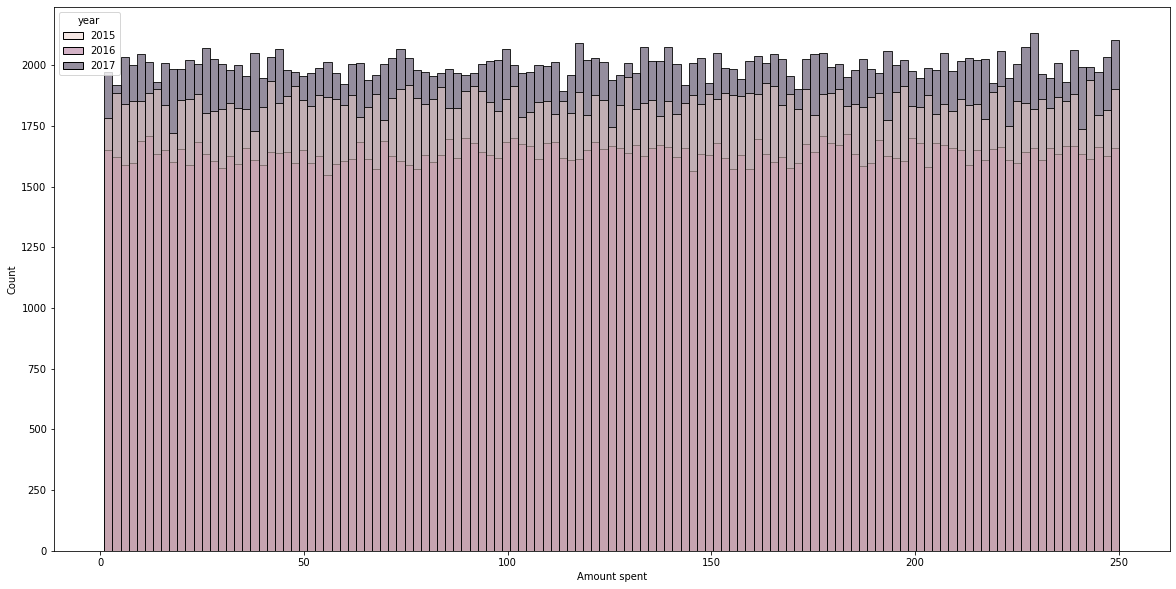

In [20]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='net_revenue',bins=125, hue='year')
plt.xlabel('Amount spent')
plt.show()

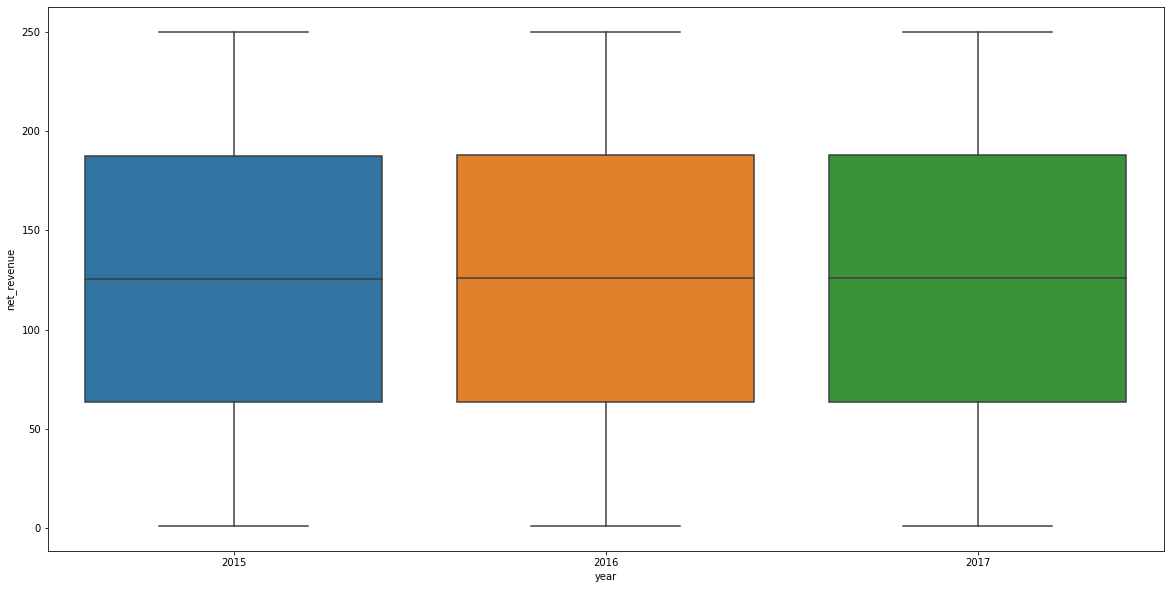

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(x='year',y='net_revenue',data=df)
plt.show()

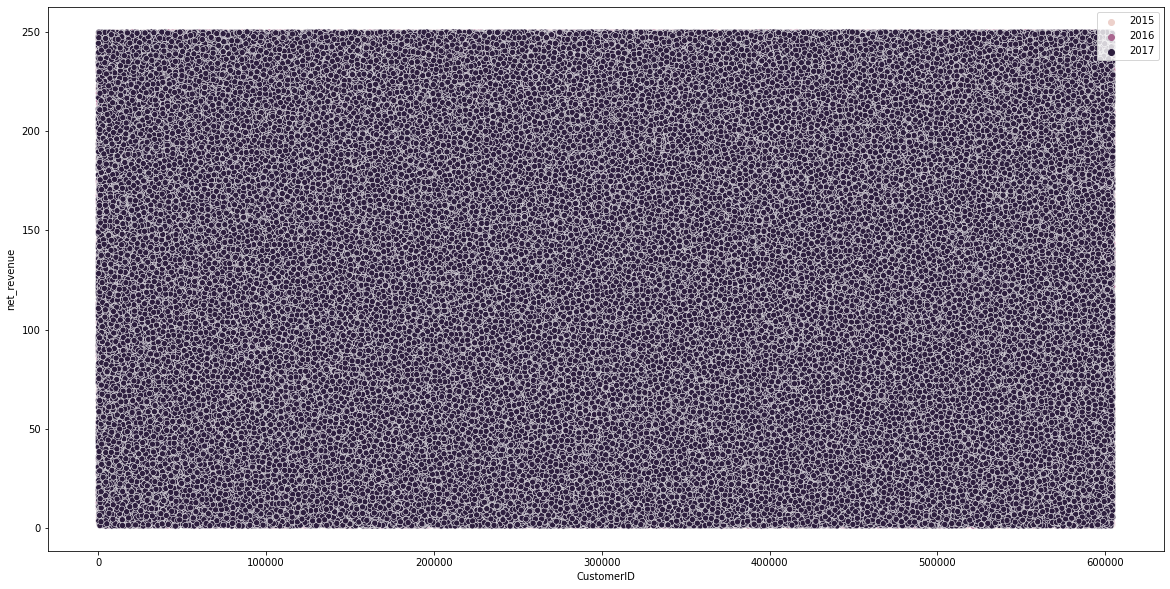

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x='customer_email', y='net_revenue', hue='year')
plt.legend(loc='upper right')
plt.xlabel('CustomerID')
plt.show()